# Machine learning - Stochastic Gradient Descent - Oscar Rotten Tomatoes

In [18]:
import os
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [19]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

## Importando o Dataframe

In [20]:
with open('oscar_rotten.pkl', 'rb') as f:
    df_rotten_tomatoes_oscars=pickle.load(f)

In [21]:
df_rotten_tomatoes_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

### Divisão entre previsores e classe

In [22]:
X_rotten_oscars = df_rotten_tomatoes_oscars.iloc[:, [7,8,10,11,12,13,14]]

In [23]:
Y_rotten_tomatoes_nominee = df_rotten_tomatoes_oscars.iloc[:, 16]

In [24]:
Y_rotten_tomatoes_winner = df_rotten_tomatoes_oscars.iloc[:, 17]

### Escalonamento dos valores

In [25]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

### Tratamento de atributos categóricos

In [26]:
X_rotten_oscars = scaler.fit_transform(X_rotten_oscars)
Y_rotten_tomatoes_nominee = label_encoder.fit_transform(Y_rotten_tomatoes_nominee)
Y_rotten_tomatoes_winner = label_encoder.fit_transform(Y_rotten_tomatoes_winner)

### Stochastic Gradient Descent Nominee

### Tuning dos parâmetros com GridSearch

In [27]:
parametros = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'max_iter': [1000, 2000, 3000],
              'penalty': ['l2', 'l1', 'elasticnet']
              }
grid_search = GridSearchCV(estimator=SGDClassifier(), param_grid=parametros)
grid_search.fit(X_rotten_oscars, Y_rotten_tomatoes_nominee)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'loss': 'log', 'max_iter': 2000, 'penalty': 'l2'}
0.8643860720830787


#### Divisão Treinamento e Teste

In [28]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_nominee_treinamento, Y_rotten_oscars_nominee_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_nominee,test_size = 0.25, random_state = 0)

#### Previsões

In [29]:
SGDC_nominee = SGDClassifier(loss = 'log', max_iter = 3000, penalty = 'elasticnet')
SGDC_nominee.fit(X_rotten_oscars_treinamento,Y_rotten_oscars_nominee_treinamento);
previsoes_rotten_nominee = SGDC_nominee.predict(X_rotten_oscars_teste)

#### Acurácia

In [30]:
accuracy_score(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

0.8477889078915221

#### Matriz de Confusão 

In [31]:
confusion_matrix(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

array([[3353,  166],
       [ 457,  117]])

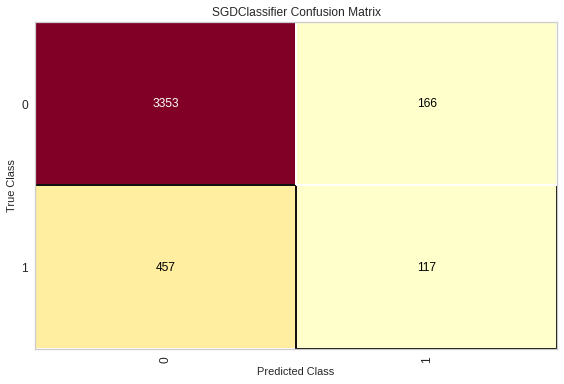

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
cm_nominee = ConfusionMatrix(SGDC_nominee)
cm_nominee.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_nominee_treinamento)
cm_nominee.score(X_rotten_oscars_teste, Y_rotten_oscars_nominee_teste)
cm_nominee.show()

#### Claissification Report

In [33]:
print(classification_report(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3519
           1       0.41      0.20      0.27       574

    accuracy                           0.85      4093
   macro avg       0.65      0.58      0.59      4093
weighted avg       0.81      0.85      0.82      4093



### Stochastic Gradient Descent Winner

### Tuning dos parâmetros com GridSearch

In [20]:
parametros = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'max_iter': [1000, 2000, 3000],
              'penalty': ['l2', 'l1', 'elasticnet']
              }
grid_search = GridSearchCV(estimator=SGDClassifier(), param_grid=parametros)
grid_search.fit(X_rotten_oscars, Y_rotten_tomatoes_winner)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
0.9497861942577887


#### Divisão Treinamento e Teste

In [34]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_winner_treinamento, Y_rotten_oscars_winner_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_winner,test_size = 0.25, random_state = 0)

#### Previsões

In [35]:
SGDC_winner = SGDClassifier(loss = 'hinge', max_iter = 1000, penalty = 'elasticnet')
SGDC_winner.fit(X_rotten_oscars_treinamento,Y_rotten_oscars_winner_treinamento);
previsoes_rotten_winner = SGDC_winner.predict(X_rotten_oscars_teste)

#### Acurácia

In [36]:
accuracy_score(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

0.9477156120205228

#### Matriz de Confusão 

In [37]:
confusion_matrix(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

array([[3879,    0],
       [ 214,    0]])

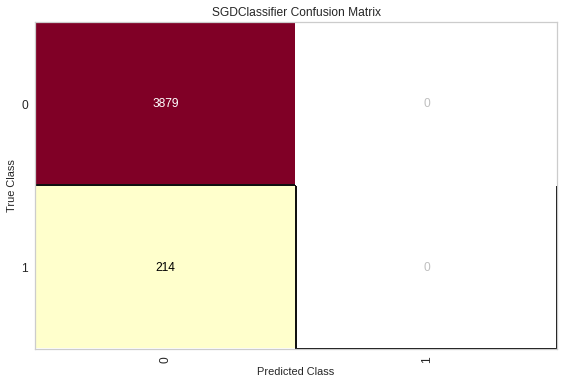

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
cm_winner = ConfusionMatrix(SGDC_winner)
cm_winner.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_winner_treinamento)
cm_winner.score(X_rotten_oscars_teste, Y_rotten_oscars_winner_teste)
cm_winner.show()

#### Claissification Report

In [29]:
print(classification_report(Y_rotten_oscars_winner_teste, previsoes_rotten_winner))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3879
           1       0.00      0.00      0.00       214

    accuracy                           0.95      4093
   macro avg       0.47      0.50      0.49      4093
weighted avg       0.90      0.95      0.92      4093

